# Q3: Even deeper! Resnet18 for PASCAL classification (15 pts)

Hopefully we all got much better accuracy with the deeper model! Since 2012, much deeper architectures have been proposed. [ResNet](https://arxiv.org/abs/1512.03385) is one of the popular ones. In this task, we attempt to further improve the performance with the “very deep” ResNet-18 architecture.


## 3.1 Build ResNet-18 (1 pts)
Write a network modules for the Resnet-18 architecture (refer to the original paper). You can use `torchvision.models` for this section, so it should be very easy! 
Do not load the pretrained weights for this question. We will get to that in the next question.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline
from resnet import ResNet
import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset



#Actually i am writing resnet in resnet.py and importing, so declared below

## 3.2 Add Tensorboard Summaries (6 pts)
You should've already written tensorboard summary generation code into `trainer.py` from q1. However, you probably just added the most basic summary features. Please implement the more advanced summaries listed here:
* training loss (should be done)
* testing MAP curves (should be done)
* learning rate
* [histogram of gradients](https://www.tensorflow.org/api_docs/python/tf/summary/histogram)

## 3.3 Train and Test (8 pts)
Use the same hyperparameter settings from Task 2, and train the model for 50 epochs. Tune hyperparameters properly to get mAP around 0.5. Report tensorboard screenshots for *all* of the summaries listed above (for image summaries show screenshots at $n \geq 3$ iterations). For the histograms, include the screenshots of the gradients of layer1.1.conv1.weight and layer4.0.bn2.bias.

**REMEMBER TO SAVE A MODEL AT THE END OF TRAINING**


In [4]:
args = ARGS(batch_size=64, epochs=50, lr=0.001, save_at_end=True, \
            save_freq=50, use_cuda=True, val_every=250, gamma=0.2, step_size=10)
model = ResNet()
optimizer = torch.optim.Adam(model.parameters(), args.lr)
#scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [20], args.gamma)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, args.step_size, args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, 'resnet18')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.716312
Train Epoch: 1 [100 (27%)]	Loss: 0.204812
Train Epoch: 2 [200 (53%)]	Loss: 0.216067
Train Epoch: 3 [300 (80%)]	Loss: 0.217491
Train Epoch: 5 [400 (6%)]	Loss: 0.196257
Train Epoch: 6 [500 (33%)]	Loss: 0.177712
Train Epoch: 7 [600 (59%)]	Loss: 0.180155
Train Epoch: 8 [700 (86%)]	Loss: 0.167347
Train Epoch: 10 [800 (13%)]	Loss: 0.167981
Train Epoch: 11 [900 (39%)]	Loss: 0.150647
Train Epoch: 12 [1000 (66%)]	Loss: 0.159790
Train Epoch: 13 [1100 (92%)]	Loss: 0.142800
Train Epoch: 15 [1200 (19%)]	Loss: 0.125673
Train Epoch: 16 [1300 (46%)]	Loss: 0.124705
Train Epoch: 17 [1400 (72%)]	Loss: 0.108823
Train Epoch: 18 [1500 (99%)]	Loss: 0.111886
Train Epoch: 20 [1600 (25%)]	Loss: 0.097949
Train Epoch: 21 [1700 (52%)]	Loss: 0.085734
Train Epoch: 22 [1800 (78%)]	Loss: 0.076886
Train Epoch: 24 [1900 (5%)]	Loss: 0.097521
Train Epoch: 25 [2000 (32%)]	Loss: 0.095540
Train Epoch: 26 [2100 (58%)]	Loss: 0.082524
Train Epoch: 27 [2200 (85%)]	Loss: 0.098191
Train Epoch

### MAP vs iteration
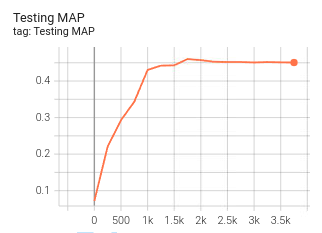

### train loss vs iteration
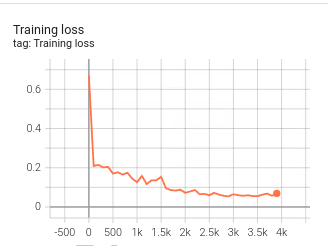

### lr vs epoch
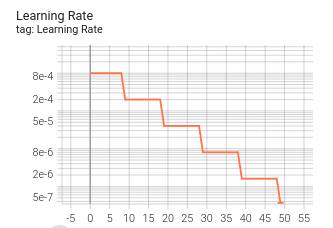

### layer1.conv1.1.weight
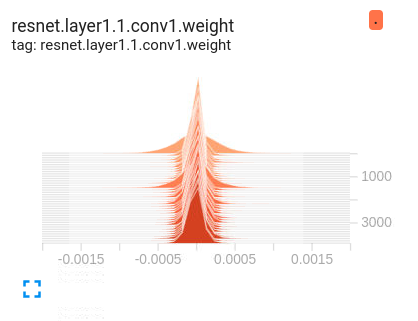

### layer4.bn2.0.bias
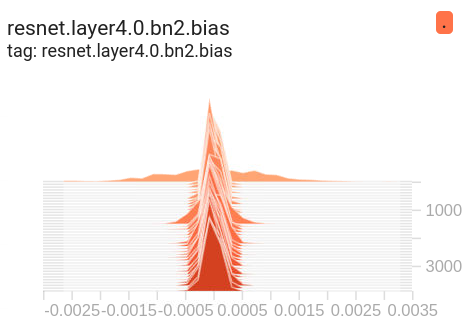